In [1]:
'''
AI Assisted GL Mapping
Code Author: Lakshya J
Data set used: "AI_POC - Updated-14May.xlsx"
Main purpose of this project is to visualize the given dataset and apply few Machine Learning libraries
to see which one fits the best for the given set of input data
'''
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import warnings
import nltk
import spacy
%matplotlib inline

In [43]:
#Converting the excel file into a pandas dataframe
training_data = pd.read_excel('AI_POC - Updated-14May.xlsx', sheet_name=0)
test_data = pd.read_excel('AI_POC - Updated-14May.xlsx', sheet_name=1)
drop_list=['Taxonomy_Id','Coa_Master_Id','tenant_id','Template_Id','Grouping_Id', 'GL_Nature.1','Level1_Grouping_Id','Level_2_Grouping_Id']
attr=["Description", "Account_Group", "GL_Nature","Level1_Grouping_Id_desc", "Level_2_Grouping_Id_desc", "Reverse_Flag"]
training_data=training_data.drop(drop_list, axis=1)

In [44]:
###Visualisation of data

#Replacing all the missing values with other values
def replace_null(df, col_name,a):
    #Converting all the values of column description as a string object type
    if col_name!="Reverse_Flag":
        df[col_name]=df[col_name].astype('str')
    df[col_name].fillna(value=a, inplace = True)

for wrd in attr:
    if wrd!='Reverse_Flag':
        replace_null(training_data, wrd, "null")
    else:
        replace_null(training_data, wrd, 0)

In [45]:
#Descriptive Statistics
training_data.describe(include='all')

,Gl_Account_Id,Description,Account_Group,GL_Nature,Grouping_Id_desc,Reverse_Flag,Level1_Grouping_Id_desc,Level_2_Grouping_Id_desc
count,35172,35172,35172,35172,35172,35172.000000,35172,35172
unique,5011,4946,752,4,472,NaN,98,43
top,Provision for Gratuity,Bank Charges,Trade receivables - other,Asset,"Trade receivables, current, unsecured, conside...",NaN,Cash and cash equivalents,"Financial Assets, current"
freq,32,48,4527,19379,5517,NaN,5308,10716
mean,NaN,NaN,NaN,NaN,NaN,0.205931,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.404386,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


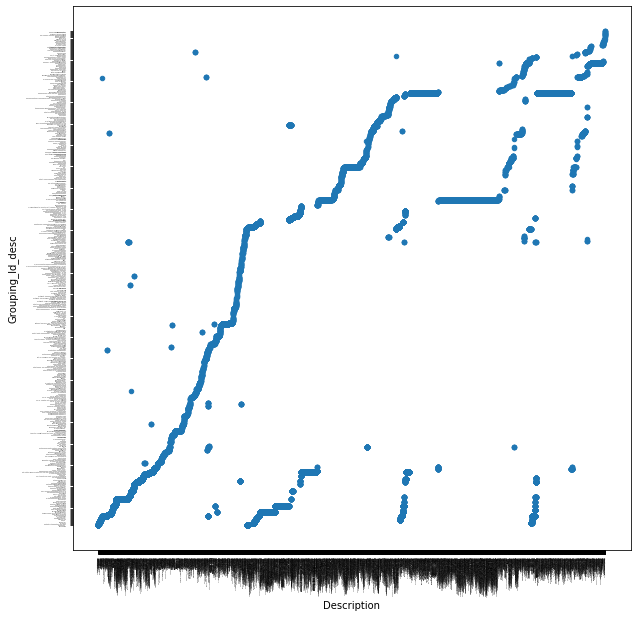

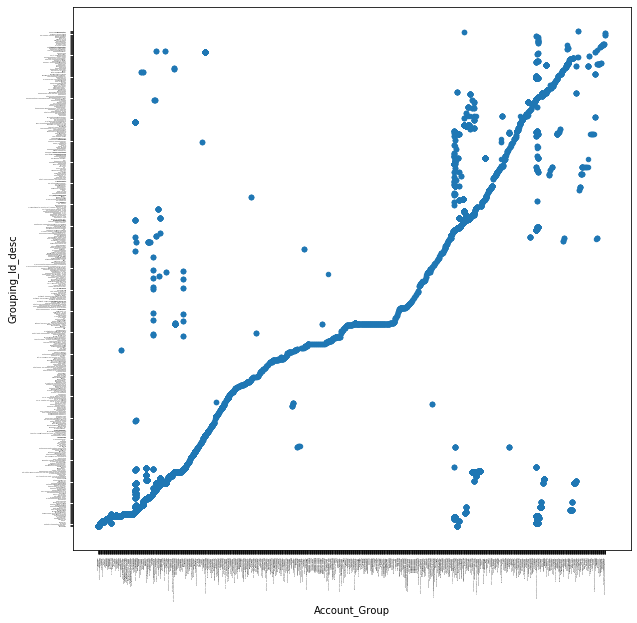

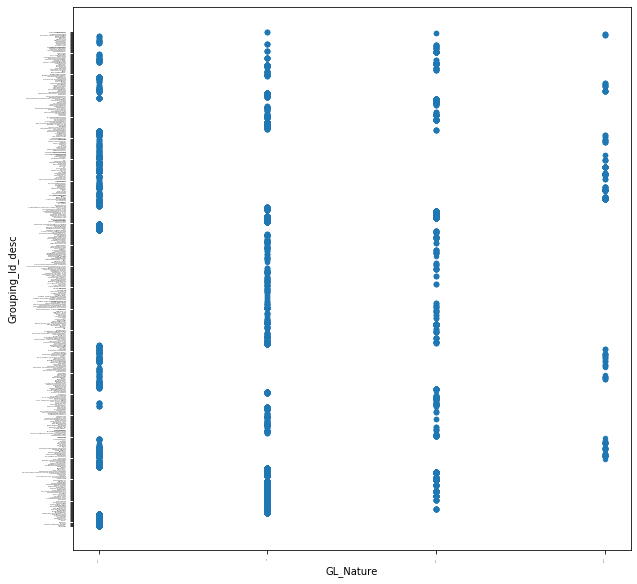

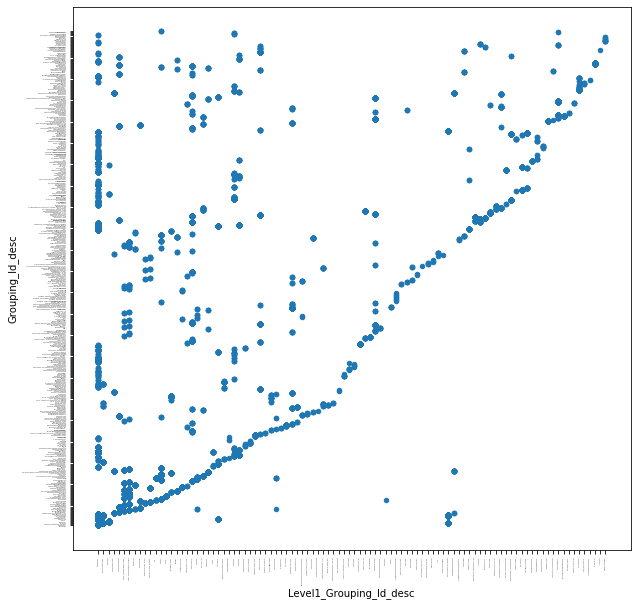

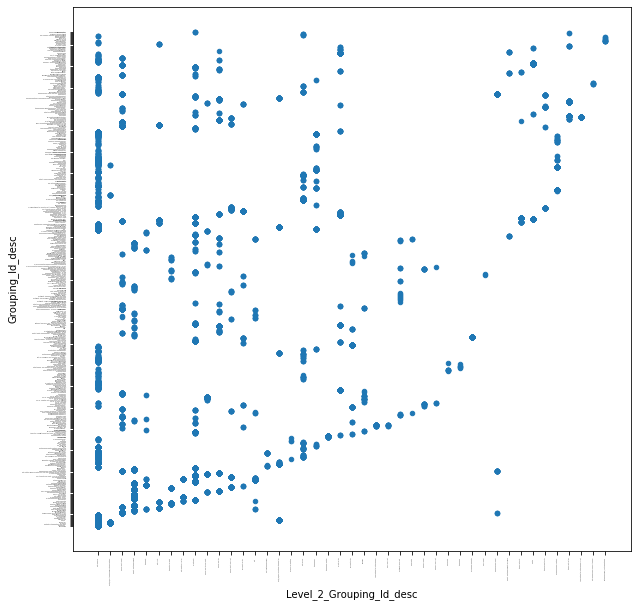

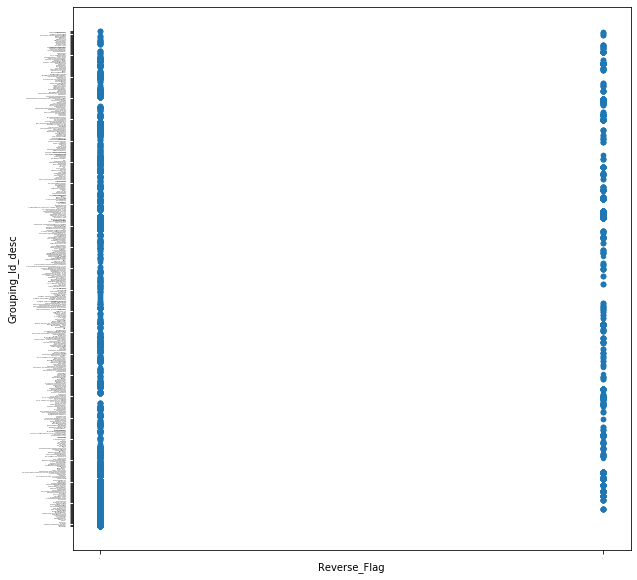

In [22]:
#Inferential Statistics

def scatter_plot(str1):
    training_data.plot.scatter(str1, "Grouping_Id_desc", fontsize=1, figsize=(10,10), rot=90)
    warnings.filterwarnings("ignore", message="Glyph 146 missing from current font.")

for wrd in attr:
    scatter_plot(wrd)

In [46]:
#Cleanup of data
def cleanup_data(df, attribute_name):
    df[attribute_name]=df[attribute_name].str.lower()
    df[attribute_name].replace('[^A-Za-z0-9 ]+', '', regex=True, inplace=True)
    small_words=[' and ', ' or ', ' so ', ' to ', ' all ', ' if ',' the ',' on ',' in ',' for ', ' of ',' a ', 
                 ' at ' ,' no ',' yes ', ' any ', ' is ', ' it ', ' are ', ' they ', ' she ', ' he ']
    df[attribute_name].replace((word for word in small_words),'',regex=True ,inplace=True)
    df[attribute_name].replace('chg',' charge ',regex=True ,inplace=True)
    df[attribute_name].replace(' loans',' loan ',regex=True ,inplace=True)
    df[attribute_name].replace(' travellg',' travelling ',regex=True ,inplace=True)
    df[attribute_name].replace('  ', ' ', regex=True, inplace=True)
    
#Function call for cleaning up of data
for wrd in attr:
    if wrd!="Reverse_Flag":
        cleanup_data(training_data, wrd)

print(training_data[1100:1110])
#Cleaning up the output column
cleanup_data(training_data, "Grouping_Id_desc")
training_data[1100:1110]


     Gl_Account_Id                                Description   Account_Group  \
1100        405821            405821 provnstockfg roto crates  finished goods   
1101        405821            405821 provnstockfg roto crates  finished goods   
1102        405821            405821 provnstockfg roto crates  finished goods   
1103        405821            405821 provnstockfg roto crates  finished goods   
1104        405825        405825 stockfg pp corrugated crates  finished goods   
1105        405825        405825 stockfg pp corrugated crates  finished goods   
1106        405825        405825 stockfg pp corrugated crates  finished goods   
1107        405825        405825 stockfg pp corrugated crates  finished goods   
1108        405826  405826 provn stockfg pp corrugated crates  finished goods   
1109        405826  405826 provn stockfg pp corrugated crates  finished goods   

     GL_Nature Grouping_Id_desc  Reverse_Flag Level1_Grouping_Id_desc  \
1100     asset   Finished goods    

,Gl_Account_Id,Description,Account_Group,GL_Nature,Grouping_Id_desc,Reverse_Flag,Level1_Grouping_Id_desc,Level_2_Grouping_Id_desc
1100,405821,405821 provnstockfg roto crates,finished goods,asset,finished goods,0,inventories,current assets
1101,405821,405821 provnstockfg roto crates,finished goods,asset,finished goods,0,inventories,current assets
1102,405821,405821 provnstockfg roto crates,finished goods,asset,finished goods,0,inventories,current assets
1103,405821,405821 provnstockfg roto crates,finished goods,asset,finished goods,0,inventories,current assets
1104,405825,405825 stockfg pp corrugated crates,finished goods,asset,finished goods,0,inventories,current assets
1105,405825,405825 stockfg pp corrugated crates,finished goods,asset,finished goods,0,inventories,current assets
1106,405825,405825 stockfg pp corrugated crates,finished goods,asset,finished goods,0,inventories,current assets
1107,405825,405825 stockfg pp corrugated crates,finished goods,asset,finished goods,0,inventories,current assets
1108,405826,405826 provn stockfg pp corrugated crates,finished goods,asset,finished goods,0,inventories,current assets
1109,405826,405826 provn stockfg pp corrugated crates,finished goods,asset,finished goods,0,inventories,current assets


In [ ]:
#Lemmatization of the text data
nlp = spacy.load('en')

for wd in attr[:-1]:
    lemma = []

    for doc in nlp.pipe(training_data[wd].astype('unicode').values, batch_size=50, n_threads=3):
        if doc.is_parsed:
            lemma.append([n.lemma_ for n in doc])
        else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
            lemma.append(None)
        lemma = sorted(lemma)   
    training_data[wd] = lemma

print(training_data[1100:1110])